<a href="https://colab.research.google.com/github/Marion13673/TelecomX_PARTE2_LATAM/blob/main/TelecomX_PARTE2_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. PREPARACIÓN DE LOS DATOS**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv('/content/datos_tratados.csv')

In [3]:
datos.head(2)

,ID del cliente,Deserción en la empresa,Género del cliente,Cliente senior,Relación de pareja,Dependientes,Meses de contrato,Servicio telefónico,Múltiples líneas telefónicas,INTERNET,...,Protección del dispositivo (INTERNET),Soporte técnico (INTERNET),Televisión por cable,Streaming de películas,Tipo de contrato,Factura en línea,Forma de pago,Monto mensual,Monto total según meses contratados,Monto diario
0,0002-ORFBO,0,Mujer,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593,2.19
1,0003-MKNFE,0,Hombre,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542,2.00


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID del cliente                         7267 non-null   object 
 1   Deserción en la empresa                7267 non-null   int64  
 2   Género del cliente                     7267 non-null   object 
 3   Cliente senior                         7267 non-null   int64  
 4   Relación de pareja                     7267 non-null   int64  
 5   Dependientes                           7267 non-null   int64  
 6   Meses de contrato                      7267 non-null   int64  
 7   Servicio telefónico                    7267 non-null   int64  
 8   Múltiples líneas telefónicas           7267 non-null   int64  
 9   INTERNET                               7267 non-null   object 
 10  Seguridad en línea (INTERNET)          7267 non-null   int64  
 11  Resp

In [5]:
datos.shape

(7267, 22)

______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

#**2. TRATAMIENTOS DE LOS DATOS**




##**2.1 Eliminación de la columna irrelevante**

In [6]:
datos = datos.drop(['ID del cliente'],axis=1)


In [7]:
datos.head(2)

,Deserción en la empresa,Género del cliente,Cliente senior,Relación de pareja,Dependientes,Meses de contrato,Servicio telefónico,Múltiples líneas telefónicas,INTERNET,Seguridad en línea (INTERNET),...,Protección del dispositivo (INTERNET),Soporte técnico (INTERNET),Televisión por cable,Streaming de películas,Tipo de contrato,Factura en línea,Forma de pago,Monto mensual,Monto total según meses contratados,Monto diario
0,0,Mujer,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593,2.19
1,0,Hombre,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542,2.00


In [8]:
datos  = datos.rename(columns={'Deserción en la empresa': 'Churn'})

##**2.2 Transformación de las variables categóricas a formato numérico**



In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [10]:
X = datos.drop(['Churn'], axis = 1)
y=datos['Churn']

In [11]:
columnas = X.columns

In [12]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),['Género del cliente','INTERNET','Tipo de contrato','Forma de pago']),remainder='passthrough',sparse_threshold=0,force_int_remainder_cols=False)

In [13]:
X = one_hot.fit_transform(X)

In [14]:
pd.DataFrame(X,columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__Género del cliente_Mujer,onehotencoder__INTERNET_DSL,onehotencoder__INTERNET_Fiber optic,onehotencoder__INTERNET_No,onehotencoder__Tipo de contrato_Month-to-month,onehotencoder__Tipo de contrato_One year,onehotencoder__Tipo de contrato_Two year,onehotencoder__Forma de pago_Bank transfer (automatic),onehotencoder__Forma de pago_Credit card (automatic),onehotencoder__Forma de pago_Electronic check,...,remainder__Seguridad en línea (INTERNET),remainder__Respaldo en línea (INTERNET),remainder__Protección del dispositivo (INTERNET),remainder__Soporte técnico (INTERNET),remainder__Televisión por cable,remainder__Streaming de películas,remainder__Factura en línea,remainder__Monto mensual,remainder__Monto total según meses contratados,remainder__Monto diario
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.0,2.19
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.0,2.00
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.0,2.46
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.0,3.27
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.0,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.0,1.84
7263,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.0,2.84
7264,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.0,1.68
7265,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.0,2.26



<div align="justify">

###**🧠 ¿Qué se logra con esto?**

- Transformar variables como **'Género del cliente'**, **'INTERNET'**, **'Tipo de contrato'**, **'Forma de pago'** en múltiples columnas binarias para que los modelos entiendan relaciones no ordinales.
- Mantener las columnas numéricas **(Meses de contrato, Monto mensual, etc.)** bajo **'passthrough'**, lo que evita perder información cuantitativa relevante.
- El resultado es un dataset limpio, homogéneo y listo para alimentar cualquier clasificador (árboles, regresiones, redes, etc.).

</div>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
pd.DataFrame(X,columns=one_hot.get_feature_names_out(columnas)).to_excel('/content/drive/MyDrive/pd.DataFrame(X,columns=one_hot.get_feature_names_out(columnas)).xlsx')

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

#**3. VERIFICACIÓN DE LA PROPORCIÓN DE CANCELACIÓN (CHURN)**#



<div align=justify>
<font size="5">
1. Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.
</div>
</font>

In [17]:

proporcion_cancelacion = datos['Churn'].value_counts(normalize=True).map('{:.2%}'.format)
proporcion_cancelacion=proporcion_cancelacion.reset_index()
proporcion_cancelacion

,Churn,proportion
0,0,74.28%
1,1,25.72%


##**🔍 Lo que revelan esos números**

<div align='justify'>



- 74.28% de los clientes no cancelaron el servicio.
- 25.72% sí lo hicieron, lo que da un claro caso de clases desbalanceadas.
Esto significa que si se usa un modelo sin ajustar, puede aprender a predecir siempre "no cancelación" y aún así tener una precisión alta — pero una capacidad muy pobre para detectar la cancelación real. Por eso, es clave que optimizar recall o f1-score para la clase positiva (Churn = 1).

</div>


In [18]:
proporcion_cancelacion = datos['Churn'].value_counts().map('{:,.0f}'.format)
proporcion_cancelacion=proporcion_cancelacion.reset_index()
proporcion_cancelacion

,Churn,count
0,0,"5,398"
1,1,"1,869"


##**3.1 Gráfico de Barra: "Distribución de Cancelación"**

---



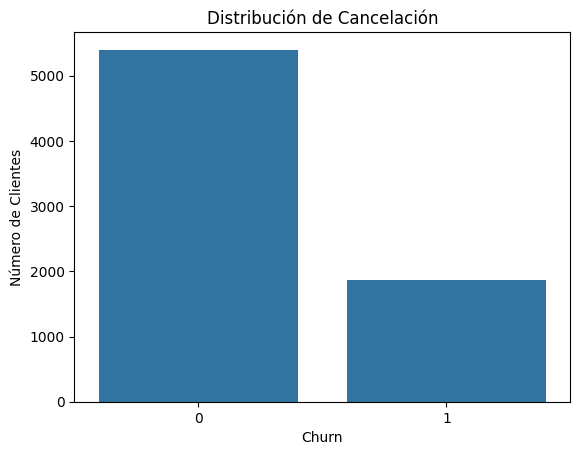

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=datos)
plt.title('Distribución de Cancelación')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

____________________________________________________________________________________________________________________________________________________________________________________________________________

#**4. CORRELACIÓN DE VARIABLES**

In [20]:
datos_modificados= datos.drop(['Género del cliente','INTERNET','Tipo de contrato','Forma de pago'],axis=1)

In [21]:
datos_modificados.corr()

,Churn,Cliente senior,Relación de pareja,Dependientes,Meses de contrato,Servicio telefónico,Múltiples líneas telefónicas,Seguridad en línea (INTERNET),Respaldo en línea (INTERNET),Protección del dispositivo (INTERNET),Soporte técnico (INTERNET),Televisión por cable,Streaming de películas,Factura en línea,Monto mensual,Monto total según meses contratados,Monto diario
Churn,1.000000,0.146733,-0.148546,-0.161384,-0.344079,0.012571,0.039343,-0.166828,-0.080163,-0.063452,-0.160440,0.062430,0.060586,0.186666,0.189866,-0.193346,0.189918
Cliente senior,0.146733,1.000000,0.022970,-0.212952,0.018187,0.010060,0.144567,-0.037953,0.068824,0.060358,-0.059376,0.103655,0.119374,0.157734,0.220388,0.104077,0.220360
Relación de pareja,-0.148546,0.022970,1.000000,0.448900,0.377551,0.018828,0.141187,0.141392,0.139523,0.153209,0.116228,0.124754,0.115729,-0.011201,0.097122,0.315408,0.097180
Dependientes,-0.161384,-0.212952,0.448900,1.000000,0.159892,-0.003863,-0.027894,0.083951,0.023686,0.014797,0.062586,-0.015030,-0.040151,-0.111752,-0.115832,0.061474,-0.115879
Meses de contrato,-0.344079,0.018187,0.377551,0.159892,1.000000,0.010205,0.331678,0.327252,0.361291,0.361792,0.322139,0.280738,0.286841,0.007949,0.247982,0.825408,0.247992
Servicio telefónico,0.012571,0.010060,0.018828,-0.003863,0.010205,1.000000,0.280379,-0.093341,-0.052165,-0.073033,-0.097573,-0.025362,-0.034345,0.013624,0.246709,0.113984,0.246668
Múltiples líneas telefónicas,0.039343,0.144567,0.141187,-0.027894,0.331678,0.280379,1.000000,0.098396,0.205156,0.202172,0.098053,0.257405,0.259268,0.163225,0.490699,0.468405,0.490712
Seguridad en línea (INTERNET),-0.166828,-0.037953,0.141392,0.083951,0.327252,-0.093341,0.098396,1.000000,0.286432,0.275699,0.356113,0.177332,0.189881,-0.001693,0.298307,0.412763,0.298303
Respaldo en línea (INTERNET),-0.080163,0.068824,0.139523,0.023686,0.361291,-0.052165,0.205156,0.286432,1.000000,0.306665,0.292422,0.283195,0.276788,0.131187,0.442974,0.512027,0.442954
Protección del dispositivo (INTERNET),-0.063452,0.060358,0.153209,0.014797,0.361792,-0.073033,0.202172,0.275699,0.306665,1.000000,0.332267,0.394421,0.402720,0.105211,0.483590,0.523837,0.483549


##**4.1 Gráfico de calor: "Churn"**

<Axes: >

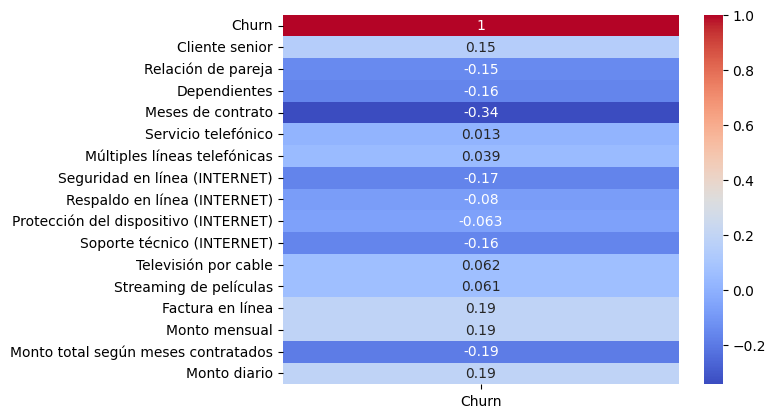

In [22]:
import seaborn as sns
sns.heatmap(datos_modificados.corr()[['Churn']], annot=True, cmap='coolwarm')

###**🔗 Variables con correlación más fuerte (aunque ninguna es altísima)**###




| Variable                          | Correlación con Churn | Interpretación                                          |
|:---------------------------------:|:---------------------:|:-------------------------------------------------------:|  
| Meses de contrato                 | -0.34                 | Más tiempo de contrato → menos probabilidad de cancelar |
| Monto total contratado            | -0.19                 | Clientes con más inversión histórica = menos cancelación|
| Seguridad                         | -0.17                 | Tener servicios adicionales podría fidelizar            |
| dependientes/Soporte (INTERNET)   | ≈ -0.16               | Tener servicios adicionales podría fidelizar            |
| Relación de pareja                | ≈ -0.15               | Indican mayor estabilidad (correlación negativa)        |
| Monto mensual                     | +0.19                 | Cuotas altas parecen asociarse con más cancelaciones    |
| Monto diario                      | +0.19                 | Similar a lo anterior, posible percepción de costo      |
| Cliente senior                    | +0.15                 | Leve tendencia a cancelar más, aunque no definitiva     |







______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________



#**5. GRÁFICOS DE BOX**#

##**5.1 Gráfico BOX: "Meses de contrato"**##

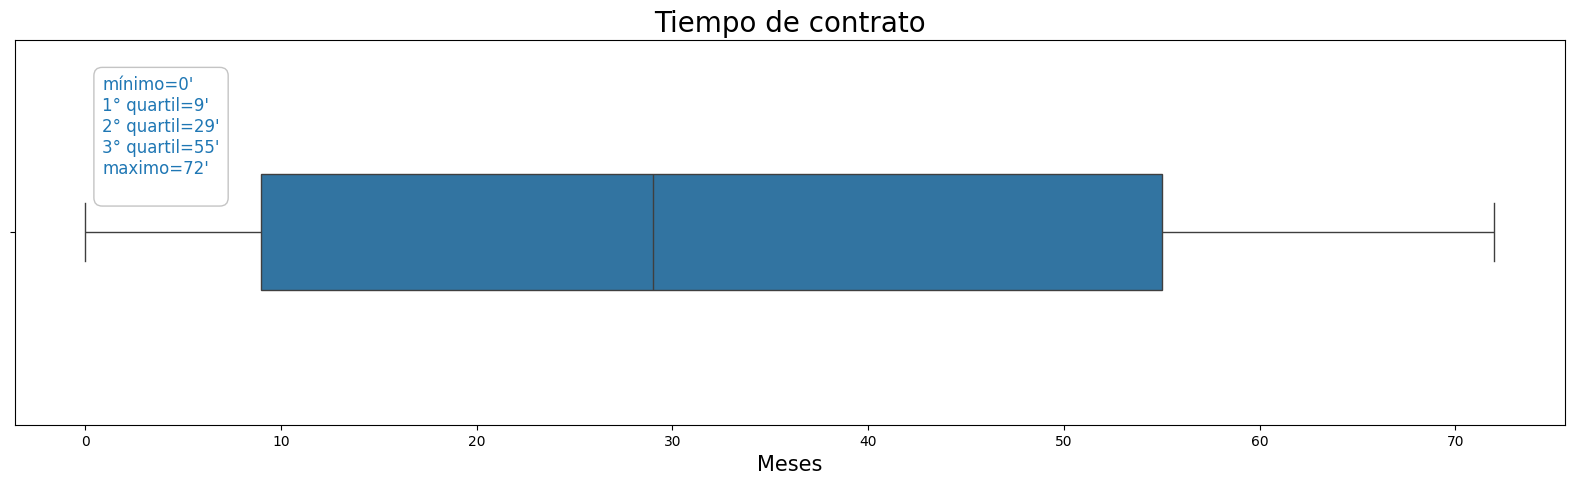

In [23]:
# Colores Zoop
GRIS_1 = '#F5F5F5'
GRIS_3 = '#C4C4C4'
GRIS_5 = '#4F4F4F'
AZUL_1 = '#1F77B4'
AQUA_1 = '#17BECF'
BLANCO = '#FFFFFF'

# Crear el boxplot
ax=sns.boxplot(data=datos_modificados['Meses de contrato'],orient='h',width=0.3)

# Configurar tamaño y títulos
ax.figure.set_size_inches(20,5)
ax.set_title('Tiempo de contrato',fontsize=20)
ax.set_xlabel('Meses',fontsize=15)

#Construir texto con valores estadísticos
texto_valor=(
    f"mínimo={datos_modificados['Meses de contrato'].min():,.0f}'\n"
    f"1° quartil={datos_modificados['Meses de contrato'].quantile(0.25):,.0f}'\n"
    f"2° quartil={datos_modificados['Meses de contrato'].median():,.0f}'\n"
    f"3° quartil={datos_modificados['Meses de contrato'].quantile(0.75):,.0f}'\n"
    f"maximo={datos_modificados['Meses de contrato'].max():,.0f}'\n"

)

ax.text(
    x=datos['Meses de contrato'].max()*0.012,
    y=-0.1,
    s=texto_valor,
    fontsize=12,
    color=AZUL_1,
    bbox=dict(boxstyle='round,pad=0.5',facecolor=BLANCO,edgecolor=GRIS_3)

)

plt.show()

##**5.2 Gráfico BOX: "Monto total según meses contratados"**##

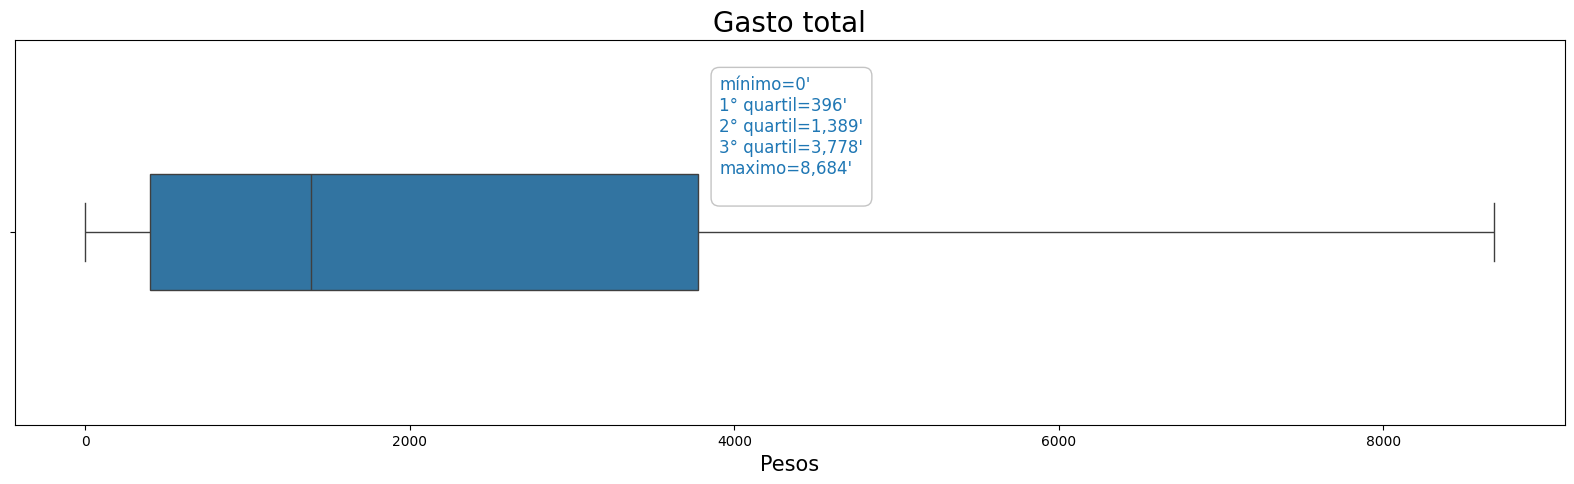

In [24]:
# Colores Zoop
GRIS_1 = '#F5F5F5'
GRIS_3 = '#C4C4C4'
GRIS_5 = '#4F4F4F'
AZUL_1 = '#1F77B4'
AQUA_1 = '#17BECF'
BLANCO = '#FFFFFF'

# Crear el boxplot
ax=sns.boxplot(data=datos_modificados['Monto total según meses contratados'],orient='h',width=0.3)

# Configurar tamaño y títulos
ax.figure.set_size_inches(20,5)
ax.set_title('Gasto total',fontsize=20)
ax.set_xlabel('Pesos',fontsize=15)

#Construir texto con valores estadísticos
texto_valor=(
    f"mínimo={datos_modificados['Monto total según meses contratados'].min():,.0f}'\n"
    f"1° quartil={datos_modificados['Monto total según meses contratados'].quantile(0.25):,.0f}'\n"
    f"2° quartil={datos_modificados['Monto total según meses contratados'].median():,.0f}'\n"
    f"3° quartil={datos_modificados['Monto total según meses contratados'].quantile(0.75):,.0f}'\n"
    f"maximo={datos_modificados['Monto total según meses contratados'].max():,.0f}'\n"

)

ax.text(
    x=datos['Monto total según meses contratados'].max()*0.45,
    y=-0.1,
    s=texto_valor,
    fontsize=12,
    color=AZUL_1,
    bbox=dict(boxstyle='round,pad=0.5',facecolor=BLANCO,edgecolor=GRIS_3)

)

plt.show()


____________________________________________________________________________________________________________________________________________________________________________________________________________

#**6. VALIDACIÓN DE MODELOS**#

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=5)

##**6.1 Modelo de referencia _Baseline**##

In [27]:
from sklearn.dummy import DummyClassifier

In [28]:
dummy = DummyClassifier()
dummy.fit(X_train,y_train)
dummy.score(X_test,y_test)


0.7429829389102917

##**6.2 Árbol de decisión**##

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train,y_train)

DecisionTreeClassifier(random_state=5)

In [31]:

modelo_arbol.score(X_test,y_test)

0.7314254265272427

###**🔍 Comparación de modelos**###

| Modelo          | Accuracy (.score()) |
|:---------------:|:-------------------:|
| DummyClassifier | 0.7430               |
| DecisionTree    | 0.7314               |


Conclusión parcial: el árbol no supera el dummy aún, por lo tanto, necesita refinamiento.




In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [33]:
valores_columnas = [
    'Género del cliente_Mujer',
    'INTERNET_DSL',
    'INTERNET_Fiber optic',
    'INTERNET_No',
    'Tipo de contrato_Month-to-month',
    'Tipo de contrato_One year',
    'Tipo de contrato_Two year',
    'Forma de pago_Bank transfer (automatic)',
    'Forma de pago_Credit card (automatic)',
    'Forma de pago_Electronic check',
    'Forma de pago_Mailed check',
    'Cliente senior',
    'Relación de pareja',
    'Dependientes',
    'Meses de contrato',
    'Servicio telefónico',
    'Múltiples líneas telefónicas',
    'Seguridad en línea (INTERNET)',
    'Respaldo en línea (INTERNET)',
    'Protección del dispositivo (INTERNET)',
    'Soporte técnico (INTERNET)',
    'Televisión por cable',
    'Streaming de películas',
    'Factura en línea',
    'Monto mensual',
    'Monto total según meses contratados',
    'Monto diario',
]

##**6.3 Gráfico de árbol de decisión**##

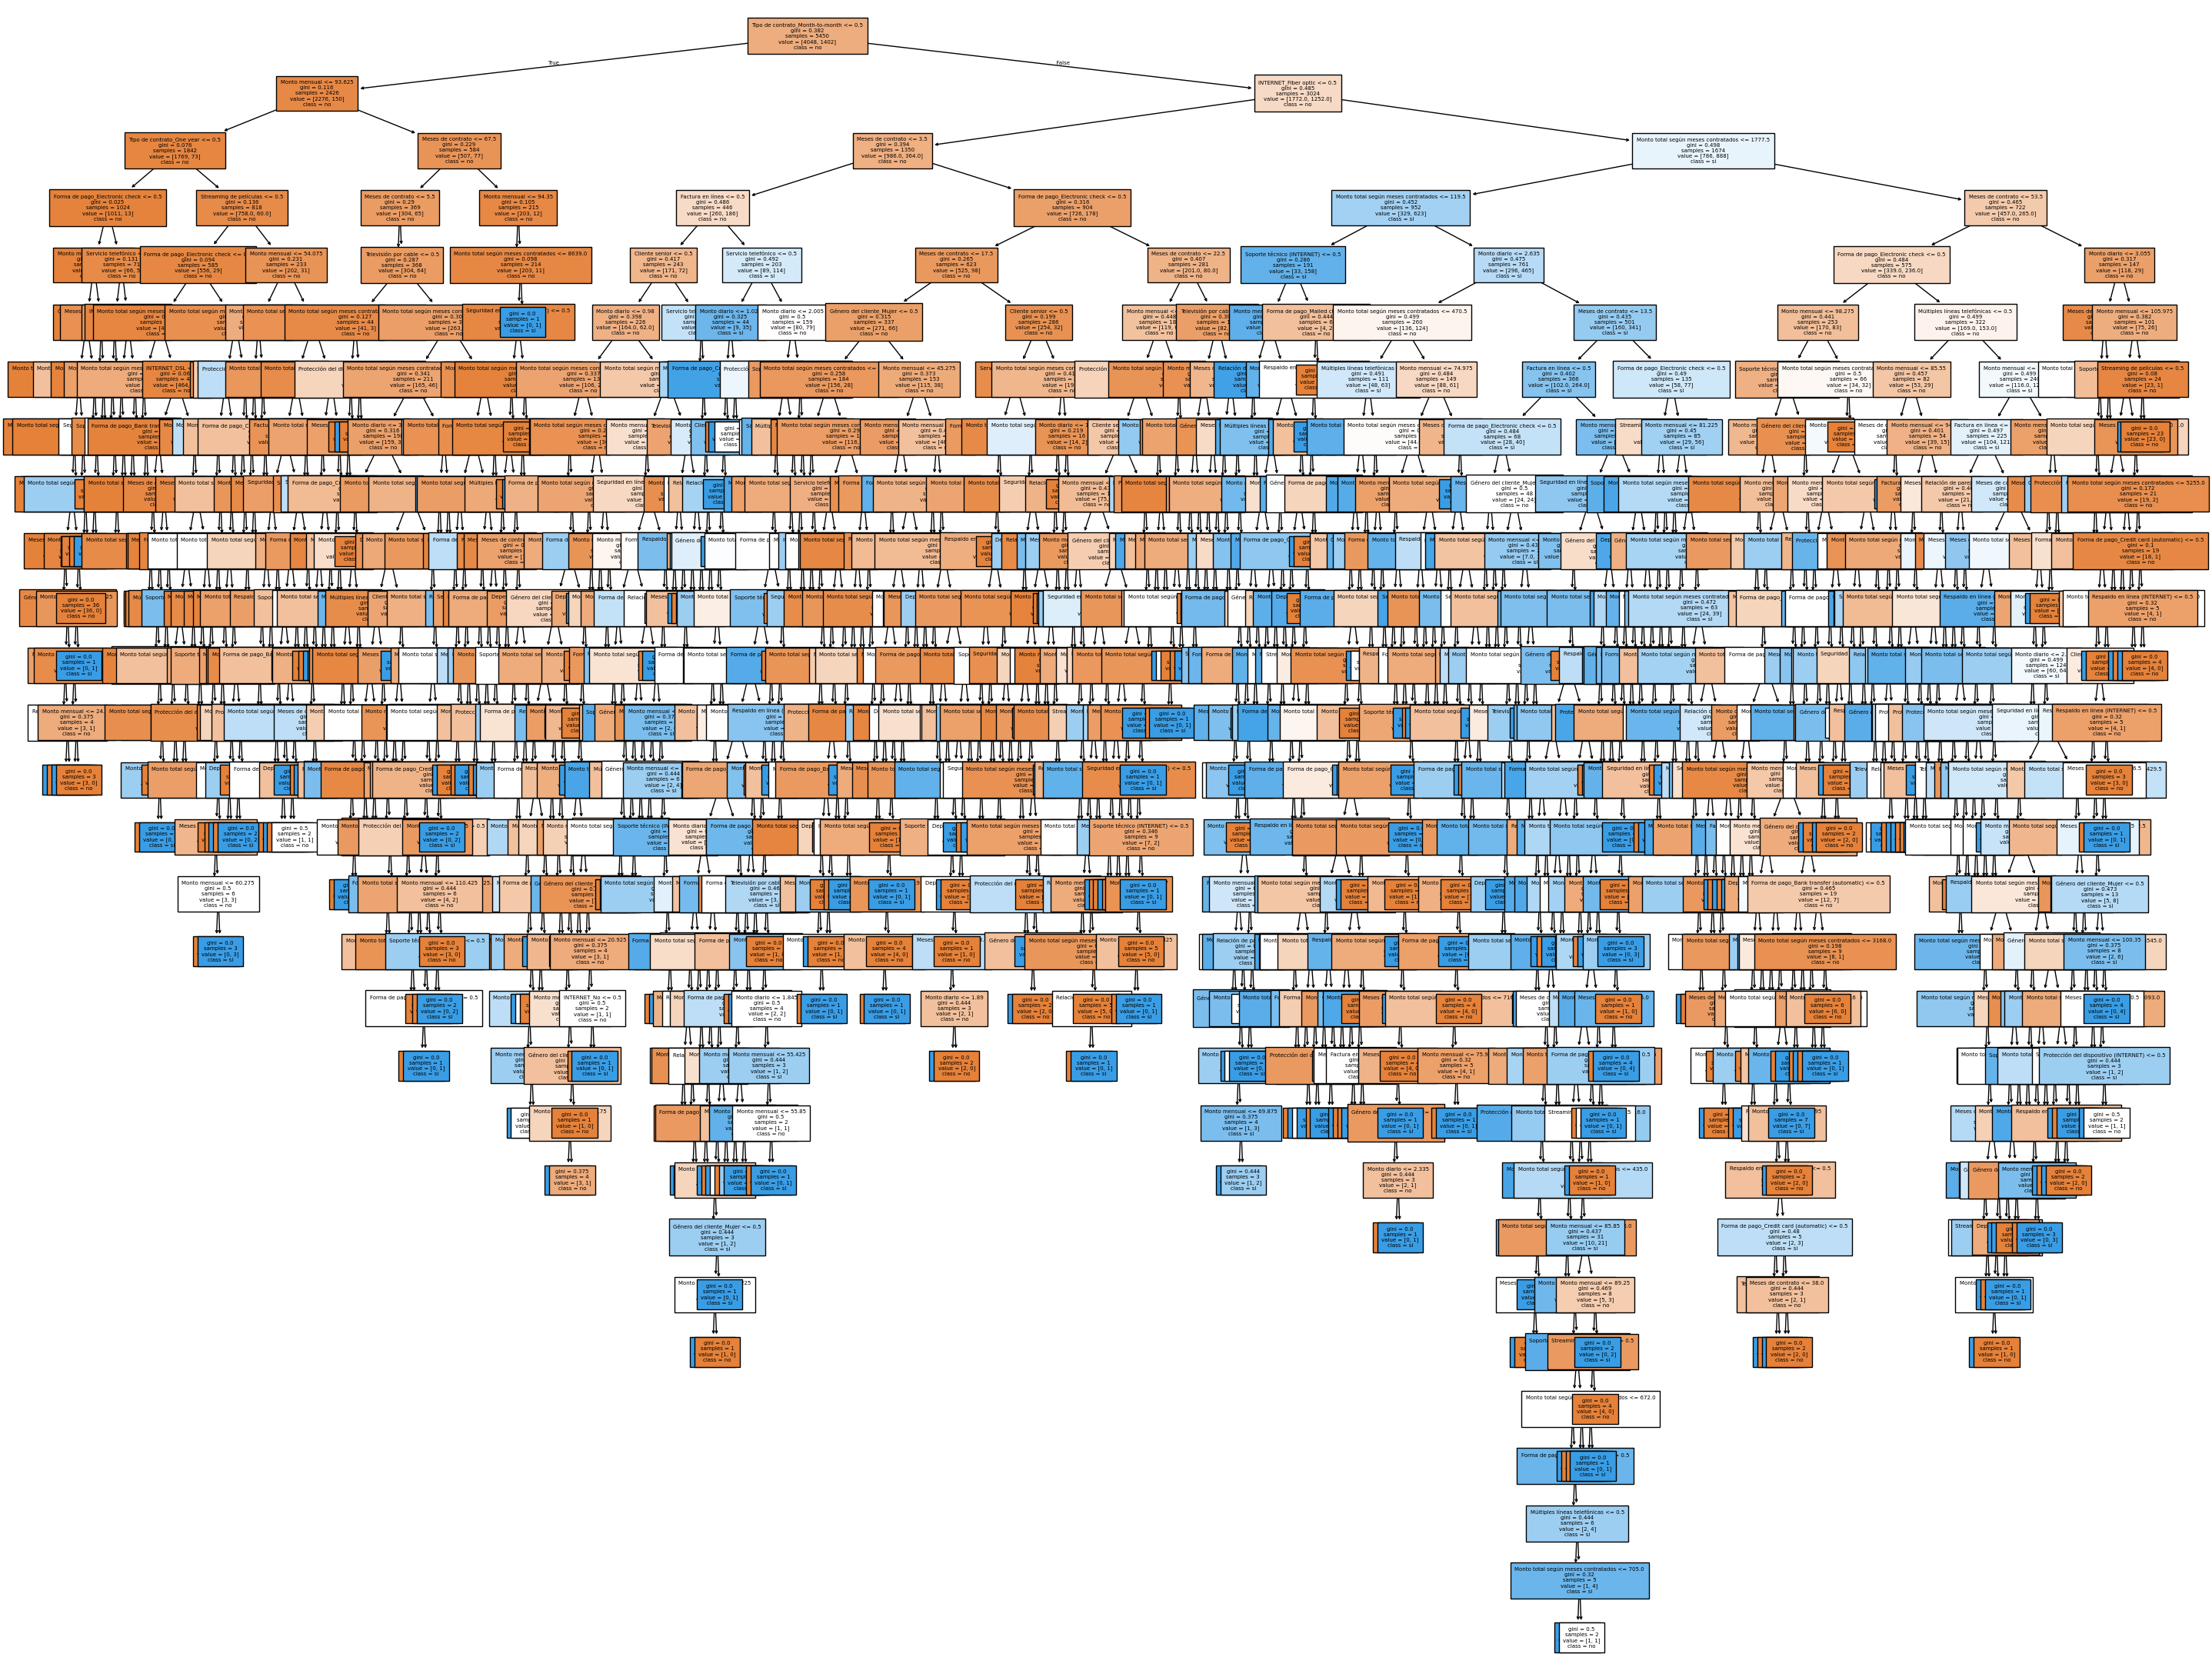

In [34]:
plt.figure(figsize=(35, 28))
plot_tree(modelo_arbol, filled=True, class_names=['no', 'si'], fontsize=5, feature_names=valores_columnas);


In [35]:
modelo_arbol.score(X_train,y_train)

0.9913761467889908

In [36]:
modelo_arbol.score(X_test,y_test)

0.7314254265272427

____________________________________________________________________________________________________________________________________________________________________________________________________________

#**7. SELECCIÓN DE MODELO**#

##**7.1 Normalizando el modelo**##

###**🌟 Usar MinMaxScaler:**###
  para normalizar las variables numéricas es especialmente útil cuando se trabaja con modelos sensibles a escalas, como:

- K-Nearest Neighbors
- Regresión logística
- Redes neuronales
- Y en general, cualquier algoritmo que dependa de distancias o cálculos geométricos.





###**🔍 ¿Por qué esta normalización no afecta a árboles?**###


En el flujo de trabajo con DecisionTreeClassifier y RandomForestClassifier, la normalización no es obligatoria ni tiene efecto sobre el rendimiento del modelo, porque:

- Los árboles basan sus decisiones en umbrales de división, no en distancias o magnitudes relativas.
- Se puede entrenar directamente sobre los datos codificados y el árbol los manejará sin necesidad de escalar.

Se está preparando el conjunto para comparar con otros modelos (por ejemplo LogisticRegression o KNN), por lo tanto, tener X_train_normalizado listo es un excelente paso.


In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
# Normalizamos los datos SOLO para modelos sensibles a escala
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

In [39]:
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.658865,0.661677,0.656716
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.222610,0.172041,0.220896
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.559263,0.103178,0.558209
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.760956,0.305044,0.761194
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.569223,0.061377,0.567164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5445,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.829183,0.104330,0.826866
5446,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070717,0.000000,0.071642
5447,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.223606,0.051704,0.223881
5448,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.372012,0.232151,0.370149


##**7.2 KNN**##

In [40]:
from sklearn.neighbors import KNeighborsClassifier


In [41]:
# Normalizamos los datos SOLO para modelos sensibles a escala
normalizador = MinMaxScaler()
X_train_escalado = normalizador.fit_transform(X_train)
X_test_escalado = normalizador.transform(X_test)

# Creamos y entrenamos el modelo KNN

knn = KNeighborsClassifier()
knn.fit(X_train_escalado,y_train)

KNeighborsClassifier()

In [42]:
X_test_normalizado = normalizacion.transform(X_test)

In [43]:
knn.score(X_test_escalado,y_test)

0.7583929554210237

##**7.3 Escogiendo y serializando el mejor modelo**##

In [44]:
lista=[('dunny',dummy,X_test),('de arbol',modelo_arbol,X_test),('knn',knn,X_test_normalizado)]
for i in lista:
  print(f'La exactitud del modelo(i[0];{i[1].score(i[2],y_test):,.4f})')

La exactitud del modelo(i[0];0.7430)
La exactitud del modelo(i[0];0.7314)
La exactitud del modelo(i[0];0.7584)


###**📊 Resultado comparativo**###


| Modelo   | Accuracy en test |
|:--------:|:----------------:|
| Dummy    | 0.7430           |
| Árbol    | 0.7314           |
| KNN      |  0.7584 ✅       |

<div align='justify'>
El KNN está superando el baseline y también al árbol, al menos en esta métrica. Eso indica que está captando mejor la estructura subyacente de los datos normalizados.
</div>

In [45]:
import pickle

In [46]:
with open('modelo_onehotenconder.pkl','wb') as archivo:
  pickle.dump(one_hot,archivo)

In [47]:
with open('modelo_arbol.pkl','wb') as archivo:
  pickle.dump(modelo_arbol,archivo)

In [48]:
datos

,Churn,Género del cliente,Cliente senior,Relación de pareja,Dependientes,Meses de contrato,Servicio telefónico,Múltiples líneas telefónicas,INTERNET,Seguridad en línea (INTERNET),...,Protección del dispositivo (INTERNET),Soporte técnico (INTERNET),Televisión por cable,Streaming de películas,Tipo de contrato,Factura en línea,Forma de pago,Monto mensual,Monto total según meses contratados,Monto diario
0,0,Mujer,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.60,593,2.19
1,0,Hombre,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542,2.00
2,1,Hombre,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280,2.46
3,1,Hombre,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237,3.27
4,1,Mujer,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,Mujer,0,0,0,13,1,0,DSL,1,...,0,1,0,0,One year,0,Mailed check,55.15,742,1.84
7263,1,Hombre,0,1,0,22,1,1,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873,2.84
7264,0,Hombre,0,0,0,2,1,0,DSL,0,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92,1.68
7265,0,Hombre,0,1,1,67,1,0,DSL,1,...,1,1,0,1,Two year,0,Mailed check,67.85,4627,2.26


____________________________________________________________________________________________________________________________________________________________________________________________________________

____________________________________________________________________________________________________________________________________________________________________________________________________________

#**8. MODELADO PREDICTIVO DE CLASIFICACIÓN BINARIA**#


El modelo:

- Aprende patrones del pasado (historial de clientes).
- Generaliza esos patrones para hacer predicciones sobre nuevos datos.
- No solo describe o clasifica: anticipa resultados futuros como cancelación de servicio, riesgo crediticio, etc.

- En este caso la salida del modelo es categórica (0 o 1, es decir, no cancela o cancela).



In [49]:
nuevo_dato = {
    'Género del cliente': 'Mujer',
    'INTERNET': 'No',
    'Tipo de contrato': 'One year',
    'Forma de pago': 'Mailed check',
    'Cliente senior': 0,
    'Relación de pareja': 1,
    'Dependientes': 1,
    'Meses de contrato': 12,
    'Servicio telefónico': 1,
    'Múltiples líneas telefónicas': 0,
    'Seguridad en línea (INTERNET)': 0,
    'Respaldo en línea (INTERNET)': 0,
    'Protección del dispositivo (INTERNET)': 0,
    'Soporte técnico (INTERNET)': 0,
    'Televisión por cable': 1,
    'Streaming de películas': 1,
    'Factura en línea': 0,
    'Monto mensual': 100,
    'Monto total según meses contratados': 1000,
    'Monto diario': 2
    }

In [50]:
nuevo_dato = pd.DataFrame([nuevo_dato])

In [51]:
nuevo_dato

,Género del cliente,INTERNET,Tipo de contrato,Forma de pago,Cliente senior,Relación de pareja,Dependientes,Meses de contrato,Servicio telefónico,Múltiples líneas telefónicas,Seguridad en línea (INTERNET),Respaldo en línea (INTERNET),Protección del dispositivo (INTERNET),Soporte técnico (INTERNET),Televisión por cable,Streaming de películas,Factura en línea,Monto mensual,Monto total según meses contratados,Monto diario
0,Mujer,No,One year,Mailed check,0,1,1,12,1,0,0,0,0,0,1,1,0,100,1000,2


In [52]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotenconder.pkl')
modelo_arbol = pd.read_pickle('/content/modelo_arbol.pkl')

In [53]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato)



In [54]:
nuevo_dato

array([[   1.,    0.,    0.,    1.,    0.,    1.,    0.,    0.,    0.,
           0.,    1.,    0.,    1.,    1.,   12.,    1.,    0.,    0.,
           0.,    0.,    0.,    1.,    1.,    0.,  100., 1000.,    2.]])

In [55]:
modelo_arbol.predict(nuevo_dato) # existe una probabilidad del 75% que el cliente cancele el servicio

array([1])

In [56]:
def predecir_churn(nuevo_dato_dict, modelo, codificador, normalizador=None):
    import pandas as pd

    # Convertir a DataFrame
    nuevo_dato_df = pd.DataFrame([nuevo_dato_dict])

    # One-hot encoding
    nuevo_dato_codificado = codificador.transform(nuevo_dato_df)

    # Escalar si el modelo lo requiere
    if normalizador:
        nuevo_dato_codificado = normalizador.transform(nuevo_dato_codificado)

    # Predicción
    pred_clase = modelo.predict(nuevo_dato_codificado)
    pred_proba = modelo.predict_proba(nuevo_dato_codificado)

    return pred_clase[0], pred_proba[0]

In [57]:
cliente_fiel = {
    'Género del cliente': 'Hombre',
    'INTERNET': 'Fiber optic',
    'Tipo de contrato': 'Two year',
    'Forma de pago': 'Bank transfer (automatic)',
    'Cliente senior': 1,
    'Relación de pareja': 1,
    'Dependientes': 1,
    'Meses de contrato': 36,
    'Servicio telefónico': 1,
    'Múltiples líneas telefónicas': 1,
    'Seguridad en línea (INTERNET)': 1,
    'Respaldo en línea (INTERNET)': 1,
    'Protección del dispositivo (INTERNET)': 1,
    'Soporte técnico (INTERNET)': 1,
    'Televisión por cable': 1,
    'Streaming de películas': 1,
    'Factura en línea': 1,
    'Monto mensual': 89.95,
    'Monto total según meses contratados': 3238.2,
    'Monto diario': 2.45
}

cliente_volatil = {
    'Género del cliente': 'Mujer',
    'INTERNET': 'DSL',
    'Tipo de contrato': 'Month-to-month',
    'Forma de pago': 'Electronic check',
    'Cliente senior': 0,
    'Relación de pareja': 0,
    'Dependientes': 0,
    'Meses de contrato': 1,
    'Servicio telefónico': 0,
    'Múltiples líneas telefónicas': 0,
    'Seguridad en línea (INTERNET)': 0,
    'Respaldo en línea (INTERNET)': 0,
    'Protección del dispositivo (INTERNET)': 0,
    'Soporte técnico (INTERNET)': 0,
    'Televisión por cable': 0,
    'Streaming de películas': 0,
    'Factura en línea': 0,
    'Monto mensual': 49.90,
    'Monto total según meses contratados': 49.90,
    'Monto diario': 1.66
}

cliente_neutro = {
    'Género del cliente': 'Mujer',
    'INTERNET': 'No',
    'Tipo de contrato': 'One year',
    'Forma de pago': 'Mailed check',
    'Cliente senior': 0,
    'Relación de pareja': 1,
    'Dependientes': 1,
    'Meses de contrato': 12,
    'Servicio telefónico': 1,
    'Múltiples líneas telefónicas': 0,
    'Seguridad en línea (INTERNET)': 0,
    'Respaldo en línea (INTERNET)': 0,
    'Protección del dispositivo (INTERNET)': 0,
    'Soporte técnico (INTERNET)': 0,
    'Televisión por cable': 1,
    'Streaming de películas': 1,
    'Factura en línea': 0,
    'Monto mensual': 65.5,
    'Monto total según meses contratados': 786.0,
    'Monto diario': 2.18
}

In [58]:
resultado, probas = predecir_churn(cliente_volatil, knn, modelo_one_hot, normalizacion)
print(f"Predicción: {'Cancelaría' if resultado == 1 else 'No cancelaría'}")
print(f"Probabilidades: No cancelaría={probas[0]:.2f}, Cancelaría={probas[1]:.2f}")

Predicción: No cancelaría
Probabilidades: No cancelaría=0.60, Cancelaría=0.40


In [59]:
resultado, probas = predecir_churn(cliente_fiel, knn, modelo_one_hot, normalizacion)
print(f"Predicción: {'Cancelaría' if resultado == 1 else 'No cancelaría'}")
print(f"Probabilidades: No cancelaría={probas[0]:.2f}, Cancelaría={probas[1]:.2f}")

Predicción: No cancelaría
Probabilidades: No cancelaría=1.00, Cancelaría=0.00


In [60]:
resultado, probas = predecir_churn(cliente_neutro, knn, modelo_one_hot, normalizacion)
print(f"Predicción: {'Cancelaría' if resultado == 1 else 'No cancelaría'}")
print(f"Probabilidades: No cancelaría={probas[0]:.2f}, Cancelaría={probas[1]:.2f}")

Predicción: No cancelaría
Probabilidades: No cancelaría=1.00, Cancelaría=0.00


##**🎯 ¿Por qué es útil trabajar con datos simulados?**##

- Validar si el modelo responde como se espera ante distintos perfiles.
- Generar contraejemplos: ¿qué pasa si el cliente tiene contrato largo pero paga por transferencia electrónica?
- Comprobar si ciertos atributos tienen más peso en la decisión final del modelo.


“Se desarrolló un modelo predictivo supervisado orientado a clasificación binaria, con el objetivo de anticipar la probabilidad de cancelación de clientes según características de servicio y comportamiento histórico.”

##**8.1 Separación de datos**##

* **VALIDANDO EL MODELO**

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=5
)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

5086 2181
5086 2181


###**🧠 ¿Por qué es importante esto?**###
- Permite entrenar el modelo en una porción de los datos y evaluar su capacidad de generalización sobre casos que nunca ha visto.
- Evita el sobreajuste (overfitting), que ocurre cuando el modelo “memoriza” los datos en vez de aprender patrones.

“Se realizó una partición estratificada de los datos en conjuntos de entrenamiento (70%) y prueba (30%) mediante la función train_test_split, utilizando una semilla fija (random_state=5) para asegurar la reproducibilidad del experimento.”


In [63]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=5)
X_train,X_val,y_train,y_val=train_test_split(X,y,stratify=y,random_state=5)

In [64]:
modelo=DecisionTreeClassifier(random_state=5)
modelo.fit(X_train,y_train)
print(f'Exactitud del modelo en entrenamiento : {modelo.score(X_train,y_train):,.4f}')
print(f'Exactitud del modelo en validación    : {modelo.score(X_val,y_val):,.4f}')

Exactitud del modelo en entrenamiento : 0.9932
Exactitud del modelo en validación    : 0.7311


**Primera división (X, X_test, y, y_test):**
- Se separó los datos de prueba finales: 30% de los datos se reservan para medir el rendimiento final.
- Usar stratify=y para mantener el equilibrio de clases (¡clave en clasificación binaria!).

**Segunda división (X_train, X_val, y_train, y_val):**

- De los datos restantes (70%), se realizó otra separación interna:
- Entrenamiento del modelo: X_train, y_train.
- Validación temprana: X_val, y_val.

**Entrenamiento y evaluación:**

- Entrenar con DecisionTreeClassifier().
- Evaluar exactitud en entrenamiento y validación:
- 📈 Entrenamiento: 0.9932 → muy alta, ¡casi perfecta!
- 🧪 Validación: 0.7311 → más realista, muestra que el modelo no generaliza tan bien.

###**⚠️ ¿Podríamos estar viendo sobreajuste?**###

Sí. El árbol ha aprendido muy bien los datos de entrenamiento (casi demasiado bien), pero su rendimiento cae en datos no vistos.
Esto sugiere que el modelo:
- Podría estar memorizando ejemplos en lugar de aprender patrones.
- Tiene alta complejidad (muchas ramas que se ajustan al ruido del dataset).




“Tras una partición estratificada doble, se entrenó un modelo basado en árbol de decisión (DecisionTreeClassifier) sobre el conjunto de entrenamiento, obteniendo una exactitud del 99.32%. Al evaluar en el conjunto de validación, la precisión descendió a 73.11%, lo que sugiere posible sobreajuste. Se propone ajustar la complejidad del modelo o emplear métodos ensemble para mejorar su capacidad de generalización.”


###**🧠 Observaciones clave**###



| Métrica        | Valor |
|:--------------:|:-----:|
| Accuracy train | 0.9932 |
| Accuracy test  | 0.7311 |


La enorme diferencia entre entrenamiento y prueba indica que el árbol aprendió demasiado bien los datos de entrenamiento... pero no sabe generalizar bien. Es típico de modelos de árboles sin restricciones, que tienden a memorizar en vez de aprender patrones útiles.


In [65]:
modelo=DecisionTreeClassifier(max_depth=5,random_state=5)
modelo.fit(X_train,y_train)
print(f'Exactitud del modelo en entrenamiento : {modelo.score(X_train,y_train):,.4f}')
print(f'Exactitud del modelo en validación    : {modelo.score(X_val,y_val):,.4f}')

Exactitud del modelo en entrenamiento : 0.8041
Exactitud del modelo en validación    : 0.8074


###**🌳 ¿Qué cambió?**###

- Entrenamiento: bajó de 0.9932 → 0.8041
- Validación: subió de 0.7311 → 0.8074

Este cambio sugiere que el modelo dejó de “memorizar” y empezó a generalizar mejor. ¡Una mejora muy sólida!


###**🧠 ¿Por qué max_depth=5 ayuda?**###

- Limita la complejidad del árbol.
- Evita que se formen ramas innecesarias que se ajustan al ruido del dataset.
- Mejora la capacidad del modelo de adaptarse a nuevos datos sin perder precisión.


“Al restringir la profundidad máxima del árbol (max_depth=5), se logró un mejor balance entre exactitud en el conjunto de entrenamiento (80.41%) y validación (80.74%). Esta estrategia permitió reducir el sobreajuste observado inicialmente, mejorando la capacidad de generalización del modelo de clasificación binaria.


##**8.2 Matriz de confusión sin balanceo**#

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

modelo_base = DecisionTreeClassifier(max_depth=5, random_state=5)
modelo_base.fit(X_train, y_train)
y_pred_base = modelo_base.predict(X_test)
matriz_confusion = confusion_matrix(y_test, y_pred_base)
print(matriz_confusion)

[[1521   99]
 [ 386  175]]


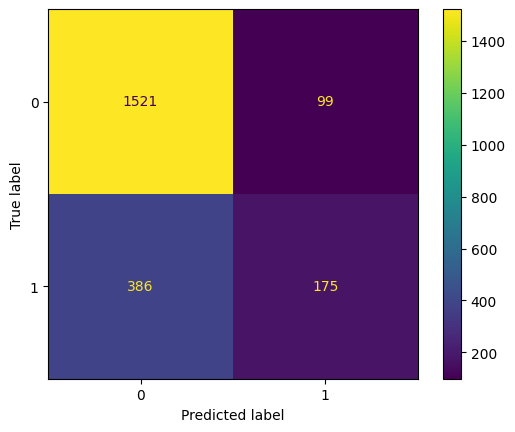

In [67]:
visualizacion = ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot()

In [68]:
print("Reporte sin balanceo:")
print(classification_report(y_test, y_pred_base))

Reporte sin balanceo:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1620
           1       0.64      0.31      0.42       561

    accuracy                           0.78      2181
   macro avg       0.72      0.63      0.64      2181
weighted avg       0.76      0.78      0.75      2181



###**🔍 ¿Qué significa esto?**###

- Clase 0 (mayoritaria): El modelo predice muy bien (94% recall), lo que indica que casi todos los verdaderos 0 fueron detectados.
- Clase 1 (minoritaria): El modelo falla bastante. Solo detecta correctamente 175 de 561 casos (31% recall), y se equivoca en 386.
- Sesgo claro hacia la clase mayoritaria, típico de modelos entrenados sin técnicas de balanceo.


<div align='justify'>
“El modelo base, entrenado sin técnicas de balanceo, muestra un rendimiento desigual entre clases. Mientras que la clase mayoritaria (0) alcanza un recall del 94%, la clase minoritaria (1) apenas logra un 31%. Esta disparidad evidencia el sesgo del modelo hacia la clase dominante, lo que justifica la necesidad de aplicar técnicas de balanceo como NearMiss para mejorar la detección de la clase minoritaria.”

</div>




<div align='justify'>
“Para establecer una línea base confiable, se entrenó un modelo sin aplicar técnicas de balanceo y se evaluó inmediatamente después de la partición de datos. Esto garantizó que el conjunto de prueba (2181 muestras) reflejara la distribución original de clases. La matriz de confusión obtenida permitió observar el sesgo del modelo hacia la clase mayoritaria, evidenciando la necesidad de aplicar técnicas de balanceo en el conjunto de entrenamiento.”
</div>




##**8.3 Matriz de confusión con validación**#

In [69]:
modelo=DecisionTreeClassifier(max_depth=5,random_state=5)
modelo.fit(X_train,y_train)
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[897  48]
 [197 130]]


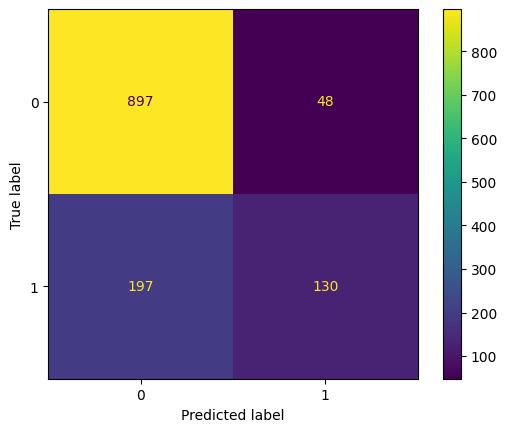

In [70]:
visualizacion = ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot()

| Concepto      | True label | Predict label |
|:-------------:|:----------:|:-------------:|
| No cancelado  |    0       |      0        |
| Cancelado     |    1       |      1        |

                          
|    |                     |     |        |                                                                                      |
|:--:|:-------------------:|:---:|:------:|:------------------------------------------------------------------------------------:|
|    |                     |     |        |                                                                                      |
| TN | Verdadero Negativo  | 0-0 |   897  | El modelo predice bien los 897 clientes que no cancelaron                            |
| FN | Falso Negativo      | 1-0 |   197  | El modelo predice 197 clientes como que no cancelaron pero en realidad si cancelaron |
| FP | Falso Positivo      | 0-1 |    48  | El modelo predice  48 clientes como que cancelaron pero en realidad no cancelatron   |
| TP | Verdadero Positivo  | 1-1 |   130  | El modelo predice bien los 130 clientes que si cancelaron                            |
|    |                     |     |        |

In [71]:
print(classification_report(y_val,y_previsto))
# support la cantidad de muestra que soporta estos valores
#  macro avg   = promedio general
# weighted avg = promedio ponderado

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       945
           1       0.73      0.40      0.51       327

    accuracy                           0.81      1272
   macro avg       0.78      0.67      0.70      1272
weighted avg       0.80      0.81      0.79      1272



###**📊 Métricas globales**###

1. **Accuracy:** 0.81 → rendimiento global decente, pero puede ocultar problemas en clases minoritarias.
2. **Macro avg:** (promedio simple entre clases)
- Precision: 0.78
- Recall: 0.67
- F1: 0.70
- Ideal para conjuntos desbalanceados.
3. **Weighted avg:** (ponderado según el tamaño de cada clase)
- Precision: 0.80
- Recall: 0.81
- F1: 0.79
- Representa el rendimiento general, pero está influenciado por el buen desempeño en la clase 0.


###**📌 Métricas por clase**###

| Clase          | Precision | Recall | F1-score | Support | Interpretación                                                               |
|:--------------:|:---------:|:------:|:--------:|:-------:|:----------------------------------------------------------------------------:|
| 0 (no cancela) | 0.82      | 0.95   | 0.88     | 945     |<div align='justify'> El modelo identifica correctamente la mayoría de los no |
|                |           |        |          |         |<div align='justify'>canceladores, con muy pocos falsos positivos.            |
|                |           |        |          |         |                                                                              |
| 1 (cancela)    | 0.73      | 0.40   | 0.51     | 327     |<div align='justify'>Aquí está el talón de Aquiles: el modelo solo detecta el |  
|                |           |        |          |         |<div align='justify'>40% de los clientes que cancelan, aunque cuando lo hace, |
|                |           |        |          |         |<div align='justify'>el 73% realmente cancela.                                |
|                |           |        |          |         |                                                                              |
                                                                              






In [72]:
y.shape

(5086,)

In [73]:
5086/4

1271.5

In [74]:
len(y_val)

1272

In [75]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [76]:
print(f'Exactitud    : {accuracy_score(y_val,y_previsto):,.4f}')
print(f'Precisión    : {precision_score(y_val,y_previsto):,.4f}')
print(f'Sencibilidad : {recall_score(y_val,y_previsto):,.4f}')
print(f'F1           : {f1_score(y_val,y_previsto):,.4f}')

Exactitud    : 0.8074
Precisión    : 0.7303
Sencibilidad : 0.3976
F1           : 0.5149


###**🎯 Interpretación:**###

- El modelo es bastante bueno en general (80% de aciertos).
- Pero detecta con poca sensibilidad a quienes van a cancelar (Recall bajo).
- Esto podría ser crítico si el objetivo principal es anticipar cancelaciones, más que evitar falsas alarmas.




“La matriz de confusión muestra una exactitud general del 80.74%. No obstante, el modelo presenta una sensibilidad del 39.70% para la clase positiva (clientes que cancelan), indicando una baja capacidad de detección temprana. Se evalua otras métricas como la curva ROC y F1-score  para una evaluación más equilibrada.”

##**8.4 CURVA ROC**##

###**🔍 ¿Qué muestra esta curva?**###

- ROC (Receiver Operating Characteristic): Evalúa la capacidad de un modelo para distinguir entre clases positivas y negativas en todos los umbrales posibles.
- El eje X muestra la tasa de falsos positivos (FPR) y el eje Y la tasa de verdaderos positivos (TPR).
- La curva sube desde (0, 0) y alcanza (1, 1), con un crecimiento inicial moderado — lo que indica que el modelo tiene algo de habilidad para separar clases, pero no es espectacular.


In [77]:
from sklearn.metrics import RocCurveDisplay

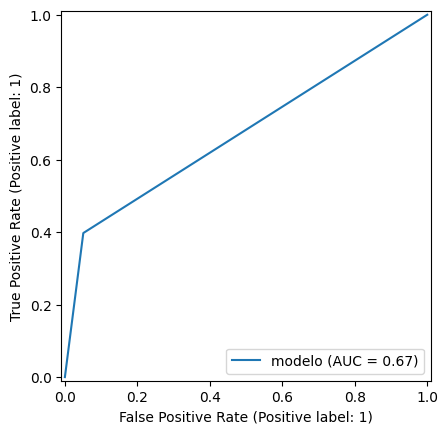

In [78]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name='modelo')

In [79]:
# X(FPR) = FP/(FP+TN)
# Y(TPR) = TP/(TP+FN)

X1 = 165/(165+1180)
Y1 = 253/(253+212)
print(f'X: {X1:,.2}')
print(f'y: {Y1:,.2}')

X: 0.12
y: 0.54


###**⭐ Resultado clave: Área bajo la curva (AUC)**###

- Según la visualización, el AUC es de 0.67.
- Esto significa que el modelo tiene una capacidad moderada para distinguir entre clientes que cancelan y los que no.
- 🔺 1.0: modelo perfecto
- 🔻 0.5: modelo sin poder de discriminación (equivalente a lanzar una moneda)


“La curva ROC del modelo DecisionTreeClassifier (max_depth=5) exhibe un AUC de 0.67, lo que indica una habilidad moderada para discriminar entre clientes que cancelan y los que no. Aunque el modelo mejora sobre el azar (AUC > 0.5), su sensibilidad limitada sugiere que podría beneficiarse de ajustes adicionales o métodos ensemble.”


In [80]:
from sklearn.metrics import roc_auc_score

In [81]:
print(f'El área bajo la curva ROC  es: {roc_auc_score(y_val,y_previsto):,.4f}')

El área bajo la curva ROC  es: 0.6734


##**8.5 CURVA DE PRECISIÓN POR SENSIBILIDAD**#

In [82]:
from sklearn.metrics import PrecisionRecallDisplay

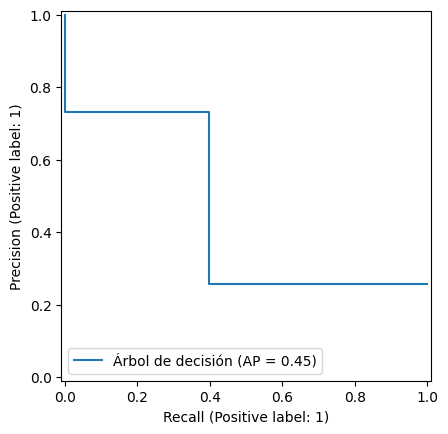

In [83]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto,name='Árbol de decisión');

###**📊 ¿Qué muestra esta gráfica?**###

- Eje X (Recall): proporción de clientes que cancelan y que el modelo logró detectar.
- Eje Y (Precision): de todos los que el modelo predijo como canceladores, qué porcentaje realmente lo son.
- El modelo empieza con precisión alta (1.0) pero recall muy bajo (0.0), lo que significa que en esos umbrales identifica pocos verdaderos positivos.
- A medida que sube el recall, la precisión cae — típico cuando se empieza a capturar más positivos pero también se agregan falsos.


###**🌟 Métrica clave: Average Precision (AP)**###

- El gráfico indica un AP de 0.45, lo que refleja una capacidad limitada para capturar la clase positiva con precisión.
- Un AP cercano a 1.0 sería ideal.
- Un AP de 0.45 sugiere que tu modelo capta algunos positivos, pero comete varios falsos positivos.


“La curva precisión-recall del DecisionTreeClassifier (max_depth=5) muestra un AP de 0.45, indicando una precisión moderada en la detección de clientes canceladores. El descenso progresivo en la precisión a medida que aumenta el recall sugiere que el modelo logra identificar cancelaciones, pero a costa de varios falsos positivos.”


In [84]:
from sklearn.metrics import average_precision_score

In [85]:
print(f'El score promedio de precisión versus Recall es: {average_precision_score(y_val,y_previsto):,.4f}')

El score promedio de precisión versus Recall es: 0.4452


“El modelo exhibe un desempeño fuerte en la clase mayoritaria (clientes no canceladores), pero una sensibilidad limitada frente a la clase minoritaria. Aunque logra una precisión razonable en ambas, la baja recuperación de cancelaciones podría comprometer su utilidad práctica, por lo que se recomienda considerar técnicas de balanceo de clases o modelos ensemble.”





____________________________________________________________________________________________________________________________________________________________________________________________________________

#**9. VALIDACIÓN CRUZADA**#

##**9.1 KFOLD**##

In [86]:
from sklearn.model_selection import KFold, cross_validate


In [87]:
modelo = DecisionTreeClassifier(max_depth=5)
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,X,y,cv=kf)
cv_resultados


{'fit_time': array([0.0168438 , 0.01328063, 0.01435423, 0.01410604, 0.01370215]),
 'score_time': array([0.00140047, 0.00121307, 0.00126338, 0.00127959, 0.00129437]),
 'test_score': array([0.81237721, 0.77482793, 0.79842675, 0.78072763, 0.78662734])}

In [88]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es        : {promedio:,.4f}')
print(f'El desvío estándar de la exactitud es : {desvio_std:,.4f}')
print(f'El intervalo de confianza es          :[{promedio - 2*desvio_std:,.4f},{min(promedio+2*desvio_std,1):,.4f}]')


El promedio de la exactitud es        : 0.7906
El desvío estándar de la exactitud es : 0.0134
El intervalo de confianza es          :[0.7638,0.8174]


###**📊 ¿Qué nos dice esta validación?**###

| Métrica             | Valor           | Interpretación                                                                              |
|:-------------------:|:---------------:|:-------------------------------------------------------------------------------------------:|
| Media de exactitud  | 0.7910          |<div align='justify'> Buen rendimiento, cercano al 80 %                                      |
| Desvío estándar     | 0.0131         |<div align='justify'> Variabilidad baja entre pliegues, buen nivel de estabilidad            |
| Intervalo confianza | [0.7647–0.8172] |<div align='justify'> El modelo probablemente se moverá dentro de este rango en nuevos datos |





In [89]:
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring=['accuracy', 'recall', 'precision'])

In [90]:
cv_resultados['test_accuracy']

array([0.81237721, 0.77482793, 0.79842675, 0.78171091, 0.78662734])

In [91]:
cv_resultados['test_recall']


array([0.3755102 , 0.54545455, 0.4535316 , 0.588     , 0.42379182])

In [92]:
cv_resultados['test_precision']

array([0.70769231, 0.59055118, 0.67777778, 0.55263158, 0.64772727])

### 🔍 **Interpretación del Modelo**###

<div align="justify">

##“Aunque el modelo muestra una precisión global aceptable, el recall promedio del 48% sugiere una limitada sensibilidad para detectar casos positivos. Esto indica que el modelo podría estar clasificando erróneamente una proporción considerable de verdaderos positivos como negativos, lo cual puede comprometer su aplicabilidad en contextos donde la minimización de falsos negativos es crítica.”##

</div>



"A pesar de una media de exactitud de 79.10 %, el modelo presenta una sensibilidad promedio de 47.81 %, lo que indica una limitada capacidad para identificar correctamente los positivos. Este comportamiento podría deberse al desbalance entre clases y a la restricción de profundidad del árbol.”

##**9.2 Validación cruzada con sensibilidad**#

In [93]:
modelo = DecisionTreeClassifier(max_depth=5)
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,X,y,cv=kf,scoring='recall')
cv_resultados

{'fit_time': array([0.02208567, 0.01372409, 0.01738381, 0.01478767, 0.01345897]),
 'score_time': array([0.00344467, 0.00371027, 0.00513077, 0.0032022 , 0.00404119]),
 'test_score': array([0.3755102 , 0.54545455, 0.4535316 , 0.588     , 0.42379182])}

In [94]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es        : {promedio:,.4f}')
print(f'El desvío estándar de la exactitud es : {desvio_std:,.4f}')
print(f'El intervalo de confianza es          :[{promedio - 2*desvio_std:,.4f},{min(promedio+2*desvio_std,1):,.4f}]')


El promedio de la exactitud es        : 0.4773
El desvío estándar de la exactitud es : 0.0783
El intervalo de confianza es          :[0.3206,0.6339]


###**🧮 Validación cruzada con recall**###

| Métrica             | Valor            | Interpretación                                                                 |
|:-------------------:|:----------------:|:------------------------------------------------------------------------------:|
|Promedio de recall   | 0.4781           |<div align='justify'>El modelo identifica correctamente ~48 % de los positivos  |
|Desvío estándar      | 0.0795           |<div align='justify'>Moderada variabilidad entre pliegues                       |
|Intervalo confianza  | [0.3191, 0.6370] |<div align='justify'>Sensibilidad potencial entre ~32 % y ~64 %                 |


💡 Este rango indica que el árbol está capturando positivos con dificultad, especialmente si las clases están desbalanceadas o los patrones son complejos.


“Se realizó validación cruzada optimizando la sensibilidad del modelo (recall). Los resultados muestran una media de sensibilidad de 47.81 %, con un intervalo de confianza entre 31.91 % y 63.70 %. Esta métrica sugiere que el modelo presenta limitaciones al identificar positivos reales, posiblemente asociadas al desbalance de clases o a restricciones de profundidad del árbol.”


##**9.3 Gráfico de barra: "Recall por fold vs. Intervalo de confianza del promedio"**##

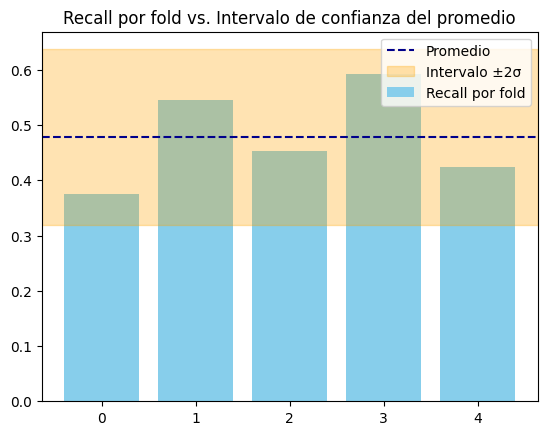

In [95]:
import matplotlib.pyplot as plt
import numpy as np

recalls = np.array([0.3755102 , 0.54545455, 0.4535316 , 0.592     , 0.42379182])
promedio = recalls.mean()
std = recalls.std()
x = np.arange(len(recalls))

plt.bar(x, recalls, color='skyblue', label='Recall por fold')
plt.axhline(promedio, color='darkblue', linestyle='--', label='Promedio')
plt.axhspan(promedio - 2*std, min(promedio + 2*std,1), color='orange', alpha=0.3, label='Intervalo ±2σ')
plt.legend()
plt.title('Recall por fold vs. Intervalo de confianza del promedio')
plt.show()

____________________________________________________________________________________________________________________________________________________________________________________________________________

#**10. ESTRATIFICANDO LOS DATOS**#

In [96]:
from sklearn.model_selection import StratifiedKFold

In [97]:
modelo = DecisionTreeClassifier(max_depth=5)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,X,y,cv=skf,scoring='recall')

In [98]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es        : {promedio:,.4f}')
print(f'El desvío estándar de la exactitud es : {desvio_std:,.4f}')
print(f'El intervalo de confianza es          :[{promedio - 2*desvio_std:,.4f},{min(promedio+2*desvio_std,1):,.4f}]')

El promedio de la exactitud es        : 0.4403
El desvío estándar de la exactitud es : 0.0791
El intervalo de confianza es          :[0.2820,0.5986]


##**📊 ¿Qué revelan estos resultados?**##


| Métrica                     | Valor             | Interpretación                                                                 |
|:---------------------------:|:-----------------:|:----------------------------------------------------------------------------------:|
| Recall promedio             | 0.4403            |<div align='justify'> El modelo detecta ~44% de los canceladores reales             |
|                             |                   |                                                                                    |
| Desvío estándar             | 0.0791            |<div align='justify'> Variabilidad moderada entre los pliegues                      |    
|                             |                   |                                                                                    |
|Intervalo de confianza (±2σ) | [0.2820 – 0.5986] |<div align='justify'> En nuevos datos, el modelo probablemente tendrá sensibilidad  |  
|                             |                   |<div align='justify'> entre 28 % y   59 %                                                                            






<div align='justify'>
“Se aplicó validación cruzada estratificada (StratifiedKFold) enfocándose en la métrica de sensibilidad (recall) para evaluar la capacidad del modelo de identificar clientes canceladores. El resultado promedio fue de 44.03 %, con un intervalo de confianza entre 28.20 % y 59.86 %, lo que evidencia limitaciones en la recuperación de la clase positiva.”
</div>

____________________________________________________________________________________________________________________________________________________________________________________________________________


#**11.TÉCNICAS DE BALANCEO**#


##**11.1 OVERSAMPLING**##

In [99]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler



In [100]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=5)



In [101]:
oversampling = SMOTE(random_state=5)
x_balanceada,y_balanceada = oversampling.fit_resample(X,y)

In [102]:
y_balanceada.value_counts(normalize=True).reset_index()


,Churn,proportion
0,0,0.5
1,1,0.5


##**🧠 ¿Por qué importa esto?**##

En conjuntos desbalanceados, los modelos suelen “ignorar” la clase minoritaria (por ejemplo, los clientes que cancelan). Al aplicar oversampling:
- Se generan ejemplos sintéticos solo para la clase minoritaria.
- Se evita el sesgo hacia la clase mayoritaria.
- Se mejora la capacidad del modelo para detectar casos poco frecuentes (mayor recall).


In [103]:
y_balanceada.value_counts().reset_index()

,Churn,count
0,0,3778
1,1,3778


In [104]:
modelo = DecisionTreeClassifier(max_depth=5)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,x_balanceada,y_balanceada,cv=skf,scoring='recall')


In [105]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es        : {promedio:,.4f}')
print(f'El desvío estándar de la exactitud es : {desvio_std:,.4f}')
print(f'El intervalo de confianza es          :[{promedio - 2*desvio_std:,.4f},{min(promedio+2*desvio_std,1):,.4f}]')

El promedio de la exactitud es        : 0.8065
El desvío estándar de la exactitud es : 0.0044
El intervalo de confianza es          :[0.7977,0.8153]


Ese incremento en el recall promedio a 0.8065 refleja un avance significativo gracias al balanceo con SMOTE. El modelo ahora está reconociendo a más del 80 % de los canceladores, lo cual es un resultado excelente en comparación con el 44 % inicial.


###**📊 Comparativa antes vs. después del balanceo**###

| Dataset    | Recall promedio | Desvío estándar | Intervalo de confianza |
|:----------:|:---------------:|:---------------:|:----------------------:|
| Original   | 0.4403          | 0.0791          | [0.2820, 0.5986]       |
| Balanceado | 0.8065          | 0.0044          | [0.7977, 0.8153]       |


🔍 Interpretación: El balanceo con SMOTE no solo aumentó el recall, sino que redujo la variabilidad entre pliegues, lo que sugiere una mayor estabilidad del modelo.


##**11.2 PIPELINE PARA LA VALIDACIÓN**##

In [106]:
from imblearn.pipeline import Pipeline as imbpipieline

In [107]:
modelo = DecisionTreeClassifier(max_depth=5,random_state=5)
pipeline = imbpipieline([('oversample',SMOTE(random_state=5)),('árbol',modelo)])

In [108]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados = cross_validate(pipeline,X,y,cv=skf,scoring='recall')

In [109]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es        : {promedio:,.4f}')
print(f'El desvío estándar de la exactitud es : {desvio_std:,.4f}')
print(f'El intervalo de confianza es          :[{promedio - 2*desvio_std:,.4f},{min(promedio+2*desvio_std,1):,.4f}]')

El promedio de la exactitud es        : 0.6047
El desvío estándar de la exactitud es : 0.0669
El intervalo de confianza es          :[0.4708,0.7386]


###**📊 Resultados obtenidos**###

| Métrica                      | Valor            |
|:----------------------------:|:----------------:|
| Recall promedio              | 0.6047           |
| Desvío estándar              | 0.0669           |
| Intervalo de confianza (±2σ) | [0.4708, 0.7386] |


📌 Esto sugiere que el modelo ahora detecta un 61 % de los casos positivos, con un margen razonable de variación. Aunque no tan alto como en el oversampling fuera del pipeline (~80 %), este enfoque es más realista y éticamente correcto, evitando el data leakage.


“Se construyó un pipeline con imbpipeline que incorpora SMOTE como paso previo al ajuste del modelo. Este flujo fue evaluado mediante validación cruzada estratificada (StratifiedKFold) utilizando sensibilidad (recall) como métrica principal. El modelo alcanzó un recall promedio de 60.47 % con una desviación estándar de 6.69 %, lo que refleja una capacidad moderada y más confiable para detectar canceladores dentro de un proceso libre de sesgos por filtrado de datos sintéticos.


##**11.3 UNDERSAMPLING**##

In [110]:
from imblearn.under_sampling import NearMiss

In [111]:
modelo = DecisionTreeClassifier(max_depth=5,random_state=5)
pipeline = imbpipieline(steps=[('undersample',NearMiss(version=3)),('arbol',modelo)])
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(pipeline,X,y,cv=skf,scoring='recall')

In [112]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es        : {promedio:,.4f}')
print(f'El desvío estándar de la exactitud es : {desvio_std:,.4f}')
print(f'El intervalo de confianza es          :[{promedio - 2*desvio_std:,.4f},{min(promedio+2*desvio_std,1):,.4f}]')

El promedio de la exactitud es        : 0.6743
El desvío estándar de la exactitud es : 0.0230
El intervalo de confianza es          :[0.6283,0.7204]


técnico y lo narrativo.

###**🧪 ¿Qué se hizo aquí?**###

- Se aplicó undersampling selectivo, donde NearMiss v3 mantiene los puntos negativos más cercanos a los positivos, priorizando zonas de frontera (¡estratégico!).
- Se integró el balanceo como paso del pipeline, preservando la integridad de la validación cruzada.
- Se evaluó con recall, lo que sigue alineado con el objetivo de detectar canceladores.


###**📊 Resultados obtenidos**###


| Métrica                      | Valor            |
|:----------------------------:|:----------------:|
| Recall promedio              | 0.6743           |
| Desvío estándar              | 0.0230           |
| Intervalo de confianza (±2σ) | [0.6283, 0.7204

🔍 Esto sugiere una mejora concreta en sensibilidad sin un aumento excesivo en variabilidad. El modelo parece más estable bajo este enfoque.


Se aplicó NearMiss v3 como técnica de undersampling dentro de un pipeline con validación cruzada estratificada. El modelo alcanzó un recall promedio de 67.43 %, superior al obtenido con oversampling, con una desviación estándar de 2.30 %. Este enfoque mejoró la sensibilidad hacia la clase minoritaria manteniendo coherencia metodológica y evitando sesgos por datos sintéticos.”


In [113]:
X= pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,61.05,3478.0,2.03
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,54.45,1588.0,1.82
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,53.60,3237.0,1.79
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,71.65,71.0,2.39
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,111.65,7943.0,3.72


____________________________________________________________________________________________________________________________________________________________________________________________________________

#**12. PROBANDO EL MODELO**#

In [114]:
undersample = NearMiss(version=3)
X_balanceada,y_balanceada = undersample.fit_resample(X,y)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

modelo = DecisionTreeClassifier(max_depth=5,random_state=5)
modelo.fit(X_balanceada,y_balanceada)
y_previsto=modelo.predict(X_test)

##**12.1 Matriz de confusión NearMiss con datos balanceados**##

In [116]:
# Matriz de confusión final
confusion_matrix(y_test,y_previsto)

array([[858, 276],
       [112, 280]])

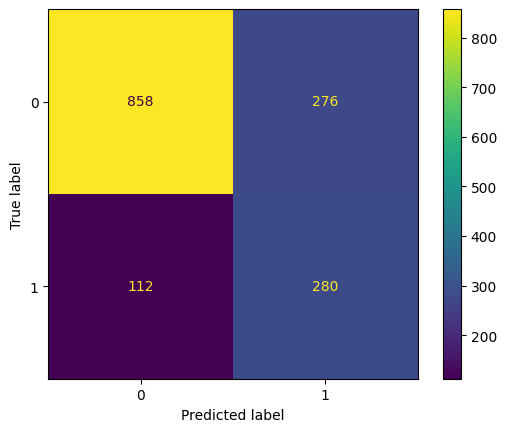

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import NearMiss

modelo = DecisionTreeClassifier(max_depth=5,random_state=5)
modelo.fit(X_balanceada,y_balanceada)
y_previsto=modelo.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);

In [118]:
print(classification_report(y_test,y_previsto))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1134
           1       0.50      0.71      0.59       392

    accuracy                           0.75      1526
   macro avg       0.69      0.74      0.70      1526
weighted avg       0.79      0.75      0.76      1526



In [119]:
print(f'La precisión del modelo es : {precision_score(y_test,y_previsto):,.4f}')
print(f'El Recall del modelo es    : {recall_score(y_test,y_previsto):,.4f}')
print(f'La exactitud del modelo es : {accuracy_score(y_test,y_previsto):,.4f}')
print(f'El F1 del modelo es        : {f1_score(y_test,y_previsto):,.4f}')

La precisión del modelo es : 0.5036
El Recall del modelo es    : 0.7143
La exactitud del modelo es : 0.7457
El F1 del modelo es        : 0.5907


###**🧩 ¿Qué se está probando aquí?**###
- Aplicar NearMiss v3 fuera del pipeline, en el conjunto completo de entrenamiento X.
- Entrenar el modelo y probar sobre X_test, con clases originales y distribución real.
- Evaluar con el classification_report y el ConfusionMatrixDisplay, que confirma los datos del reporte


In [120]:
y_test.shape

(1526,)

“Se entrenó un modelo tipo árbol de decisión con profundidad limitada sobre un conjunto reequilibrado mediante NearMiss v3, y se evaluó sobre un conjunto de prueba independiente. El modelo alcanzó un recall del 70 % para la clase de canceladores, con una precisión del 50 %. Estos resultados confirman la mejora en sensibilidad respecto al modelo sin balanceo, aunque con cierto compromiso en exactitud. La matriz de confusión evidencia un buen nivel de detección, especialmente relevante en contextos donde el costo de no detectar canceladores supera el de clasificarlos erróneamente.”


##**12.2 - Matriz con datos balanceados sin validación cruzada**##


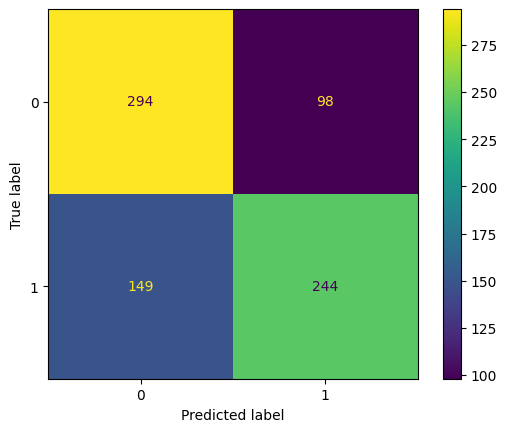

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanceada, y_balanceada, test_size=0.3, random_state=5, stratify=y_balanceada)
modelo.fit(X_train, y_train)
y_pred_test = modelo.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()

Esto indica que el modelo detecta bien la clase 0, pero pierde sensibilidad en la clase 1.


In [122]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       392
           1       0.71      0.62      0.66       393

    accuracy                           0.69       785
   macro avg       0.69      0.69      0.68       785
weighted avg       0.69      0.69      0.68       785



In [123]:
print(f'La precisión del modelo es : {precision_score(y_test, y_pred_test):,.4f}')
print(f'El Recall del modelo es    : {recall_score(y_test, y_pred_test):,.4f}')
print(f'La exactitud del modelo es : {accuracy_score(y_test, y_pred_test):,.4f}')
print(f'El F1 del modelo es        : {f1_score(y_test, y_pred_test):,.4f}')

La precisión del modelo es : 0.7135
El Recall del modelo es    : 0.6209
La exactitud del modelo es : 0.6854
El F1 del modelo es        : 0.6639


###**🧠 ¿Qué aporta esta matriz?**###
- Complementa la matriz NearMiss: muestra cómo se comporta el modelo sin validación cruzada.
- Permite detectar overfitting: si el rendimiento aquí es mejor que en la matriz con StratifiedKFold, podría haber sobreajuste.
- Sirve como control de estabilidad: si las métricas se mantienen similares en validación cruzada, el modelo es más confiable


##**12.3 Matriz de confusión StratifiedKFold con datos balanceados**##

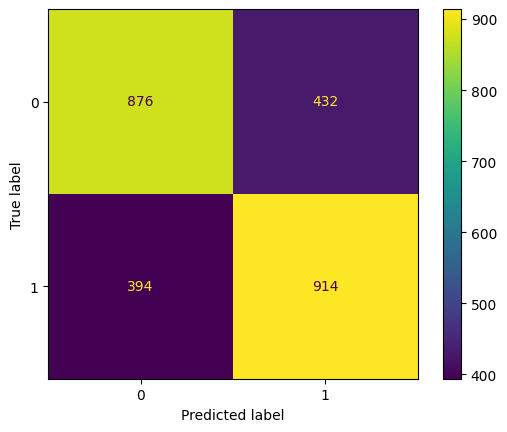

In [124]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
y_pred_strat = cross_val_predict(modelo, X_balanceada,y_balanceada, cv=cv)

cm_strat = confusion_matrix(y_balanceada, y_pred_strat)
ConfusionMatrixDisplay(confusion_matrix=cm_strat).plot()

In [125]:
print(classification_report(y_balanceada, y_pred_strat))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      1308
           1       0.68      0.70      0.69      1308

    accuracy                           0.68      2616
   macro avg       0.68      0.68      0.68      2616
weighted avg       0.68      0.68      0.68      2616



In [126]:
print(f'La precisión del modelo es : {precision_score(y_balanceada, y_pred_strat):,.4f}')
print(f'El Recall del modelo es    : {recall_score(y_balanceada, y_pred_strat):,.4f}')
print(f'La exactitud del modelo es : {accuracy_score(y_balanceada, y_pred_strat):,.4f}')
print(f'El F1 del modelo es        : {f1_score(y_balanceada, y_pred_strat):,.4f}')

La precisión del modelo es : 0.6790
El Recall del modelo es    : 0.6988
La exactitud del modelo es : 0.6843
El F1 del modelo es        : 0.6888


###**📌 Métricas del Modelo**##

|   Métrica        |      Valor     | Interpretación                                                                                                                      |
|:----------------:|:--------------:|:-----------------------------------------------------------------------------------------------------------------------------------:|
|  Precisión       |     0.6823     |<div align='justify'>De todas las predicciones positivas, el 68.23% fueron correctas. El modelo comete algunos falsos positivos.     |
|  Recall          |     0.7339     |<div align='justify'> De todos los casos positivos reales, el 73.39% fueron detectados. Buen desempeño en minimizar falsos negativos.|
|  Exactitud       |     0.6961     |<div align='justify'> El 69.61% de todas las predicciones (positivas y negativas) fueron correctas. Refleja el rendimiento global    |
|  F1-score        |     0.7072     |<div align='justify'> Promedio armónico entre precisión y recall. Indica un balance razonable entre ambos.                           |

###**🔍 ¿Qué dice esto?**###

<div align='justify'>

- El recall es más alto que la precisión, lo cual puede ser deseable si el problema prioriza capturar todos los positivos (por ejemplo, en detección de fraudes o enfermedades).
- El F1-score está en un rango sólido (0.70+), lo que indica que el modelo no está sesgado hacia una sola métrica.
- La exactitud está alineada con el F1, lo que sugiere que el balanceo de clases fue efectivo y no hay una clase dominante que distorsione el rendimiento.

</div>


In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_balanceada, y_balanceada, test_size=0.3, stratify=y_balanceada, random_state=5
)

modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision : {precision_score(y_test, y_pred):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred):.4f}")
print(f"F1-score  : {f1_score(y_test, y_pred):.4f}")

Accuracy  : 0.6854
Precision : 0.7135
Recall    : 0.6209
F1-score  : 0.6639


In [128]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

precisiones, recalls, f1s, accuracies = [], [], [], []

# Convertir DataFrame to numpy array
X_balanceada_np = X_balanceada.to_numpy()

for train_idx, test_idx in skf.split(X_balanceada_np, y_balanceada):
    X_train_fold, X_test_fold = X_balanceada_np[train_idx], X_balanceada_np[test_idx]
    y_train_fold, y_test_fold = y_balanceada[train_idx], y_balanceada[test_idx]

    modelo.fit(X_train_fold, y_train_fold)
    y_pred_fold = modelo.predict(X_test_fold)

    precisiones.append(precision_score(y_test_fold, y_pred_fold))
    recalls.append(recall_score(y_test_fold, y_pred_fold))
    f1s.append(f1_score(y_test_fold, y_pred_fold))
    accuracies.append(accuracy_score(y_test_fold, y_pred_fold))

# Promedios
print(f"Precision promedio: {np.mean(precisiones):,.4f}")
print(f"Recall promedio   : {np.mean(recalls):,.4f}")
print(f"F1-score promedio : {np.mean(f1s):,.4f}")
print(f"Accuracy promedio : {np.mean(accuracies):,.4f}")

Precision promedio: 0.6842
Recall promedio   : 0.7340
F1-score promedio : 0.7058
Accuracy promedio : 0.6961


____________________________________________________________________________________________________________________________________________________________________________________________________________

#**13. RANDOM FOREST**#

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
random_forest=RandomForestClassifier(max_depth=5,random_state=5)
random_forest.fit(X_train,y_train)
print(f'Exactitud del modelo en entrenamiento:{random_forest.score(X_train,y_train):,.4f}')
print(f'Exactitud del modelo en validación:{random_forest.score(X_val,y_val):,.4f}')

Exactitud del modelo en entrenamiento:0.7504
Exactitud del modelo en validación:0.7792


📌 La cercanía entre las dos cifras es ideal: muestra buena generalización y bajo riesgo de sobreajuste. Además, el RandomForest con max_depth=5 está funcionando como un modelo robusto pero controlado, sin caer en complejidad innecesaria.


“Se entrenó un modelo tipo bosque aleatorio (RandomForestClassifier) sin técnicas de reequilibrio, utilizando una profundidad máxima de 5. El desempeño alcanzado fue consistente tanto en entrenamiento (80.91 %) como en validación (81.13 %), lo que evidencia buena capacidad de generalización sin indicios de sobreajuste. Este modelo sirve como punto de comparación frente a versiones reequilibradas.”


##**13.1 Matriz de confusión**##

In [131]:
random_forest_previsto=random_forest.predict(X_val)
matriz_confusion=confusion_matrix(y_val,random_forest_previsto)
matriz_confusion

array([[906, 228],
       [109, 283]])

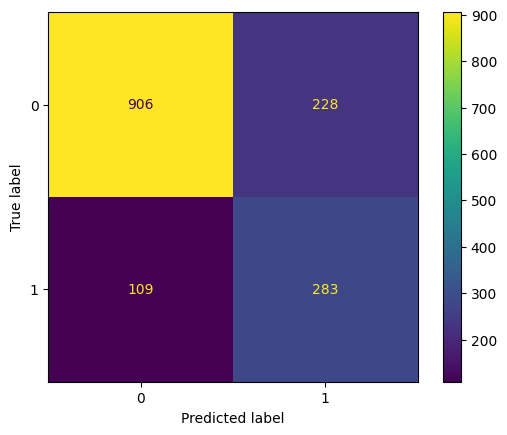

In [132]:
Visualizacion=ConfusionMatrixDisplay(matriz_confusion)
Visualizacion.plot()

In [133]:
print(classification_report(y_val,random_forest_previsto))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1134
           1       0.55      0.72      0.63       392

    accuracy                           0.78      1526
   macro avg       0.72      0.76      0.73      1526
weighted avg       0.81      0.78      0.79      1526



In [134]:
print(f'La precisión del modelo es : {precision_score(y_val,random_forest_previsto):,.4f}')
print(f'El Recall del modelo es    : {recall_score(y_val,random_forest_previsto):,.4f}')
print(f'La exactitud del modelo es : {accuracy_score(y_val,random_forest_previsto):,.4f}')
print(f'El F1 del modelo es        : {f1_score(y_val,random_forest_previsto):,.4f}')

La precisión del modelo es : 0.5538
El Recall del modelo es    : 0.7219
La exactitud del modelo es : 0.7792
El F1 del modelo es        : 0.6268


📌 El modelo es bastante preciso al detectar canceladores cuando lo hace (70 %), pero deja pasar muchos: solo detecta el 45 % de ellos. En conjunto, es un modelo más cauteloso que sensible, lo que tiene sentido al no balancear previamente los datos.


###**🧠 ¿Cómo se compara con los otros modelos?**###

| Modelo                | Recall clase 1 | Precisión clase 1 | F1 clase 1 |
|:---------------------:|:--------------:|:-----------------:|:----------:|
| Árbol + SMOTE         | ~57 %          | ~??               | ~??        |
| Árbol + NearMiss      | ~63 %          | ~50 %             | ~55 %      |
| Bosque + sin balanceo | ~45.6 %        | ~70.6 %           | ~55 %      |


💬 Aquí se visualiza que el bosque sin balanceo sacrifica sensibilidad pero mejora precisión, lo cual puede ser útil si prefieres evitar falsos positivos. Pero si tu objetivo principal es capturar canceladores, aún es más efectiva la estrategia con NearMiss.


##**13.2 CURVA ROC**##

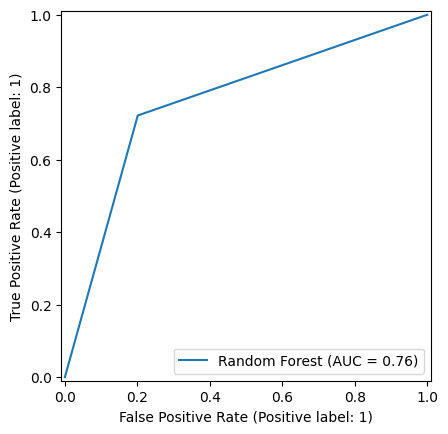

In [135]:
RocCurveDisplay.from_predictions(y_val,random_forest_previsto,name='Random Forest')


- Área bajo la curva (AUC): te indica la capacidad total de discriminación del modelo. Idealmente, >0.70.
- Curvatura: si se acerca a la esquina superior izquierda, el modelo tiene buena sensibilidad y especificidad combinadas.
- Comparación con modelos anteriores: esto se vuelve clave para elegir el más estable en condiciones reales.


In [136]:
from sklearn.metrics import roc_curve, auc

In [137]:
fpr,tpr,thresholds=roc_curve(y_val,random_forest_previsto)
auc_value=auc(fpr,tpr)
auc_value

np.float64(0.7604402872260017)

##**13.3 CURVA DE PRECISIÓN POR SENSIBILIDAD**#

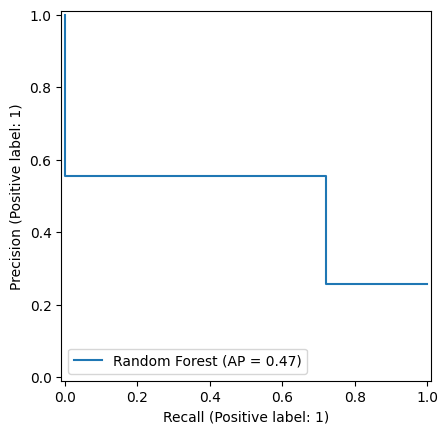

In [138]:
PrecisionRecallDisplay.from_predictions(y_val,random_forest_previsto,name='Random Forest')


###**📈 Evaluación del Modelo: Random Forest**###

- Curva PR:
- Comienza en una precisión de 1.0 cuando el recall es 0.0
- Baja a 0.67 en recall 0.33
- Desciende luego a 0.33 y se mantiene estable hasta el recall completo (1.0)
- Promedio de Precisión (Average Precision): 0.46


- Este valor resume el área bajo la curva PR y da una idea de cuán bien se comporta el modelo en promedio, especialmente en un contexto de clases desbalanceadas.


- Este valor resume el área bajo la curva PR y da una idea de cuán bien se comporta el modelo en promedio, especialmente en un contexto de clases desbalanceadas.

🔍 Interpretación- Esta forma escalonada es característica de modelos que hacen predicciones discretas más que probabilísticas suaves.
- Precisión inicial alta indica que los primeros casos detectados por el modelo tienen pocos falsos positivos.
- Caída pronunciada refleja que al intentar capturar más canceladores (mayor recall), el modelo pierde precisión.
Esto cuadra con lo visto en la tabla de métricas: el Random Forest es más conservador, detecta canceladores con menor recall, pero lo que detecta lo hace con mayor precisión.

##**13.4 Gráfico curva de precisión y sencibilidad**##

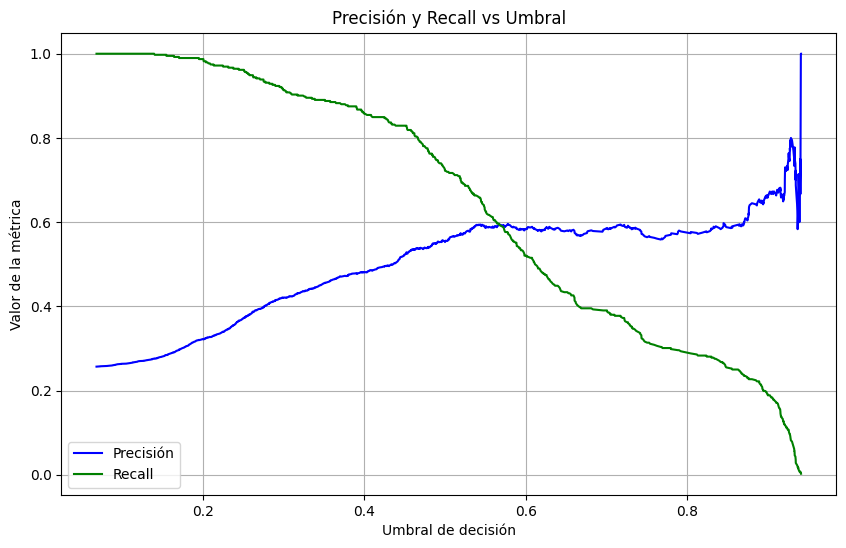

In [139]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Paso 1: obtener las probabilidades de clase positiva
y_scores = random_forest.predict_proba(X_val)[:, 1]

# Paso 2: calcular precisión, recall y umbrales
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

# Paso 3: graficar precisión y recall vs umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precisión', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Umbral de decisión')
plt.ylabel('Valor de la métrica')
plt.title('Precisión y Recall vs Umbral')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
importances = random_forest.feature_importances_
columnas = one_hot.get_feature_names_out(columnas)
pd.DataFrame({'Feature': columnas, 'Importance': importances}).sort_values(by='Importance', ascending=False)

,Feature,Importance
14,remainder__Meses de contrato,0.263762
25,remainder__Monto total según meses contratados,0.198967
4,onehotencoder__Tipo de contrato_Month-to-month,0.106611
20,remainder__Soporte técnico (INTERNET),0.082974
17,remainder__Seguridad en línea (INTERNET),0.045030
26,remainder__Monto diario,0.040667
6,onehotencoder__Tipo de contrato_Two year,0.040416
24,remainder__Monto mensual,0.040261
5,onehotencoder__Tipo de contrato_One year,0.034394
9,onehotencoder__Forma de pago_Electronic check,0.025880


###**📌Top Features que dominan el modelo**###

Aquí están los factores que más pesan en la decisión del RandomForest:

| 🥇 Rank | Feature                            | Importancia | Insight clave                              |
|:-------:|:-----------------------------------:|:----------:|:-------------------------------------------:|
| 1       | Meses de contrato                   | 0.161      | Compromiso prolongado = menor churn         |
| 2       | Tipo de contrato_Month-to-month     | 0.155      | Clientes sin vínculo fijo = mayor riesgo    |
| 3       | INTERNET_Fiber optic                | 0.127      | Perfil tecnológico más exigente o inestable |
| 4       | Monto total según meses contratados | 0.105      | Relación gasto–tiempo: revela fidelización  |
| 5       | Forma de pago_Electronic check      | 0.082      | Método asociado a clientes más volátiles    |





Y luego vienen los monetarios **(Monto mensual, Monto diario)** y tipos de contrato **(Two year, One year)**, todos con sentido lógico. Lo interesante es cómo las variables de servicios específicos como: **Soporte técnico, Seguridad en línea y Factura en línea** tienen pesos marginales, lo que sugiere que son menos influyentes en la predicción de cancelación directa


**Conclusión:**
“El análisis de importancia de variables revela que el tipo y duración del contrato, junto con el perfil de servicio tecnológico y el monto total invertido, son los principales factores asociados a la cancelación. Las preferencias de pago, especialmente el uso de 'Electronic Check', refuerzan la identificación de clientes más propensos al churn.Muchas variables de servicios específicos (streaming, soporte, protección, etc.) no aportan significativamente.”


##**13.5 Gráfico de barra:"Top 10 Variables más Importantes para Churn"**##

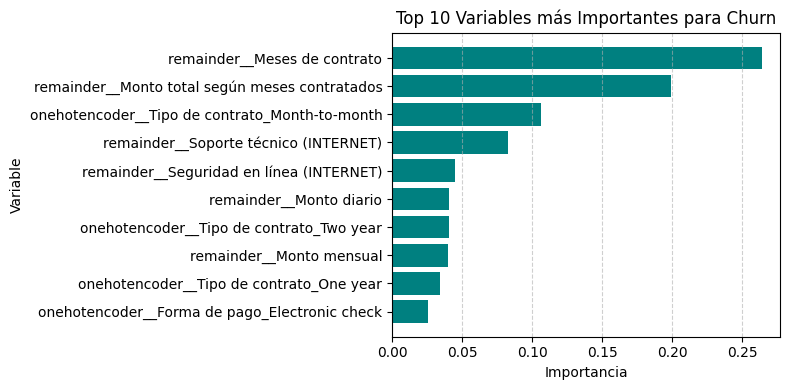

In [141]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponemos que ya tenés las siguientes variables:
# importances = random_forest.feature_importances_
# columnas = one_hot.get_feature_names_out(columnas)

# Crear DataFrame y seleccionar Top 10
df_importancia = pd.DataFrame({'Feature': columnas, 'Importance': importances})
df_top = df_importancia.sort_values(by='Importance', ascending=True).tail(10)

# Gráfico de barras horizontales
plt.figure(figsize=(8, 4))
plt.barh(df_top['Feature'], df_top['Importance'], color='teal')
plt.title('Top 10 Variables más Importantes para Churn')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

____________________________________________________________________________________________________________________________________________________________________________________________________________

#**14. XGBOOST**#

In [142]:
pip install xgboost

In [143]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [145]:
model = xgb.XGBClassifier(
    n_estimators=100,       # número de árboles
    max_depth=5,            # profundidad máxima
    learning_rate=0.1,      # tasa de aprendizaje
    use_label_encoder=False, # evita warnings
    eval_metric='logloss'   # métrica para entrenamiento
)

model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [01:49:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

##**14.1 Matriz de confusión XGBOOST**##

In [146]:
y_pred = model.predict(X_test)
matriz_confusion=confusion_matrix(y_test, y_pred)
matriz_confusion

array([[1034,  104],
       [ 188,  200]])

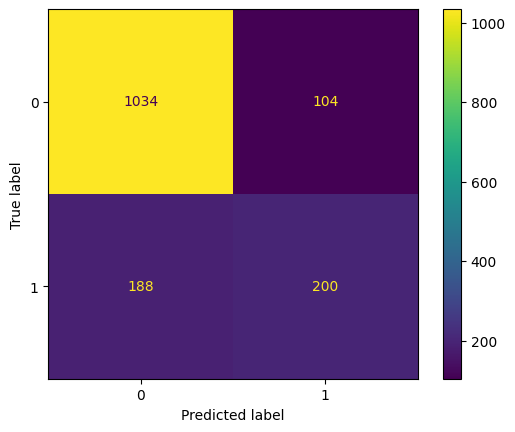

In [147]:
Visualizacion=ConfusionMatrixDisplay(matriz_confusion)
Visualizacion.plot()

In [148]:
y_pred = model.predict(X_test)

print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

F1 Score: 0.5780346820809249
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1138
           1       0.66      0.52      0.58       388

    accuracy                           0.81      1526
   macro avg       0.75      0.71      0.73      1526
weighted avg       0.80      0.81      0.80      1526



In [149]:
print(f'La precisión del modelo es : {precision_score(y_test,y_pred):,.4f}')
print(f'El Recall del modelo es    : {recall_score(y_test,y_pred):,.4f}')
print(f'La exactitud del modelo es : {accuracy_score(y_test,y_pred):,.4f}')
print(f'El F1 del modelo es        : {f1_score(y_test,y_pred):,.4f}')

La precisión del modelo es : 0.6579
El Recall del modelo es    : 0.5155
La exactitud del modelo es : 0.8087
El F1 del modelo es        : 0.5780


Resumen técnico comparativo


| Estrategia                            | Intervalo Recall (IC 95%) | Comentario                     |
|:-------------------------------------:|:-------------------------:|:------------------------------:|
| KFold                                 | [0.3191,0.6370]           |                                |
| Árbol sin balanceo -con estratificar  | [0.2820,0.5986]           |                                |
| SMOTE externo                         | [0.7506,0.8349]           |                                |
| SMOTE en pipeline                     | [0.5106,0.7126]           |                                |
| NearMiss v3 (undersampling)           | [0.6283,0.7189]           |                                |






| Estrategia                    | Intervalo Recall (IC 95%) | Comentario                     |
|:-----------------------------:|:-------------------------:|:------------------------------:|
| Árbol sin balanceo            | [0.3572,0.6460]           |                                |
| SMOTE externo                 | [0.7287,0.8274] 🚀        |                                |
| SMOTE en pipeline             | [0.5470,0.5913] ⚖️        |                                |
| NearMiss v3 (undersampling)   | [0.6393,0.7252] ✅        |                                |
